In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('kaggle dataset.csv', encoding='latin1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.shape

(5572, 5)

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.index = df.index + 1
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
5,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
unnecessary_columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns = unnecessary_columns, inplace = True)

In [8]:
df.shape

(5572, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 1 to 5572
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
readable_columns = {"v1":"Label","v2":"Content"}
df.rename(columns = readable_columns,inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 1 to 5572
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Content  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
df.sample(5)

,Label,Content
1831,ham,That's the way you should stay oh.
927,ham,But I'm on a diet. And I ate 1 too many slices...
5131,ham,Any way where are you and what doing.
931,ham,I'm really sorry i won't b able 2 do this frid...
2981,ham,7 wonders in My WORLD 7th You 6th Ur style 5th...


In [13]:
df.isnull().sum()

Label      0
Content    0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 1 to 5572
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5169 non-null   object
 1   Content  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [18]:
df.shape

(5169, 2)

In [19]:
# Preprocessing: Convert labels to binary (0 for ham, 1 for spam)
df['Label'] = df['Label'].apply(lambda x: 1 if x == 'spam' else 0)

In [20]:
df.sample(5)

,Label,Content
91,0,Yeah do! DonÛ÷t stand to close tho- youÛ÷ll ...
1808,0,Do have a nice day today. I love you so dearly.
4831,0,Po de :-):):-):-):-). No need job aha.
968,0,What do u want when i come back?.a beautiful n...
2677,0,* Am on a train back from northampton so i'm a...


In [21]:
df.head()

,Label,Content
1,0,"Go until jurong point, crazy.. Available only ..."
2,0,Ok lar... Joking wif u oni...
3,1,Free entry in 2 a wkly comp to win FA Cup fina...
4,0,U dun say so early hor... U c already then say...
5,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
spam_count = (df['Label'] == 1).sum()
ham_count = (df['Label'] == 0).sum()

print(f"Total Spam Count: {spam_count}")
print(f"Total Ham Count: {ham_count}")

Total Spam Count: 653
Total Ham Count: 4516


In [23]:
df['Label'].value_counts()

Label
0    4516
1     653
Name: count, dtype: int64

In [24]:
import matplotlib.pyplot as plt

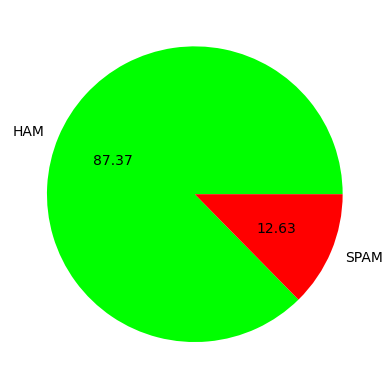

In [25]:
#autopct="%0.2f" shows %
colors = ['#00ff00', '#ff0000']
plt.pie(df['Label'].value_counts(), labels=['HAM', 'SPAM'], autopct="%0.2f", colors=colors)
plt.show()

In [26]:
#data is not balanced it leans towards ham

In [27]:
import nltk


In [28]:
!pip install nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mandi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
df['Sentence Count'] = df['Content'].apply(lambda x:len(nltk.sent_tokenize(x)))
df['Word Count'] = df['Content'].apply(lambda x:len(nltk.word_tokenize(x)))
df['Character Count'] = df['Content'].apply(len)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 1 to 5572
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Label            5169 non-null   int64 
 1   Content          5169 non-null   object
 2   Sentence Count   5169 non-null   int64 
 3   Word Count       5169 non-null   int64 
 4   Character Count  5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


In [32]:
df.sample(5)

,Label,Content,Sentence Count,Word Count,Character Count
5333,0,I think steyn surely get one wicket:),1,9,37
5097,0,But i'm really really broke oh. No amount is t...,2,21,71
1684,0,Already am squatting is the new way of walking,1,9,46
2255,0,Ok. Me watching tv too.,1,6,23
4748,0,The beauty of life is in next second.. which h...,3,30,133


In [33]:
df[df['Label'] == 0][['Sentence Count','Word Count','Character Count']].describe()

,Sentence Count,Word Count,Character Count
count,4516.000000,4516.000000,4516.000000
mean,1.820195,17.123782,70.459256
std,1.383657,13.493970,56.358207
min,1.000000,1.000000,2.000000
25%,1.000000,8.000000,34.000000
50%,1.000000,13.000000,52.000000
75%,2.000000,22.000000,90.000000
max,38.000000,220.000000,910.000000


In [34]:
df[df['Label'] == 1][['Sentence Count','Word Count','Character Count']].describe()

,Sentence Count,Word Count,Character Count
count,653.000000,653.000000,653.000000
mean,2.970904,27.667688,137.891271
std,1.488425,7.008418,30.137753
min,1.000000,2.000000,13.000000
25%,2.000000,25.000000,132.000000
50%,3.000000,29.000000,149.000000
75%,4.000000,32.000000,157.000000
max,9.000000,46.000000,224.000000


In [35]:
 df[['Sentence Count','Word Count','Character Count']].describe()

,Sentence Count,Word Count,Character Count
count,5169.000000,5169.000000,5169.000000
mean,1.965564,18.455794,78.977945
std,1.448541,13.324758,58.236293
min,1.000000,1.000000,2.000000
25%,1.000000,9.000000,36.000000
50%,1.000000,15.000000,60.000000
75%,2.000000,26.000000,117.000000
max,38.000000,220.000000,910.000000


In [36]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='Sentence Count', ylabel='Count'>

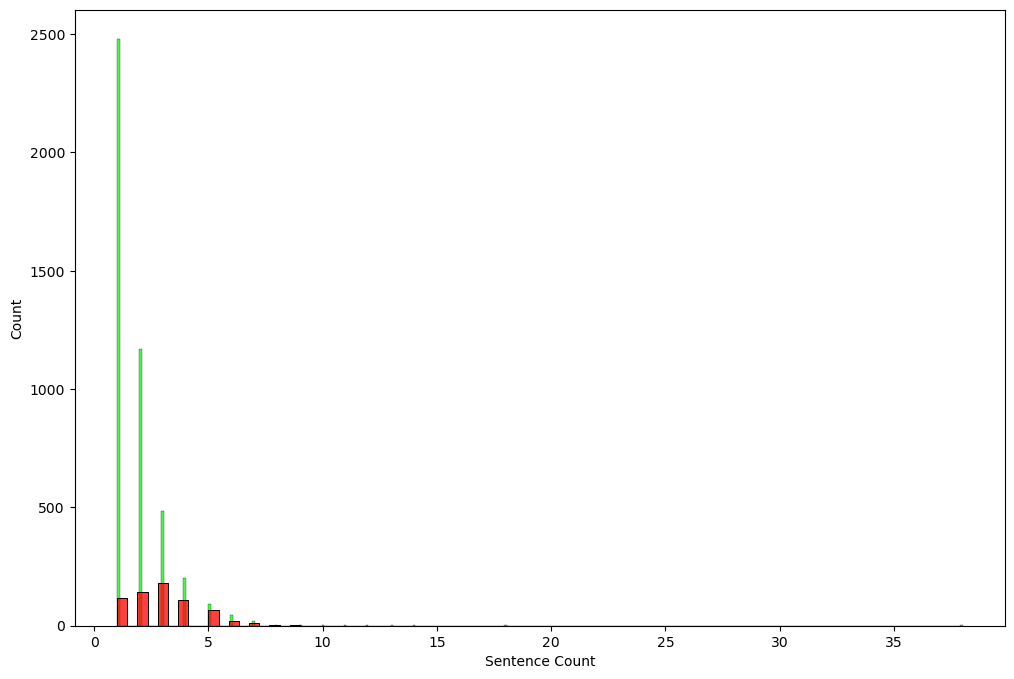

In [37]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Label'] == 0]['Sentence Count'],color='#00ff00')
sns.histplot(df[df['Label'] == 1]['Sentence Count'],color='#ff0000')

<Axes: xlabel='Word Count', ylabel='Count'>

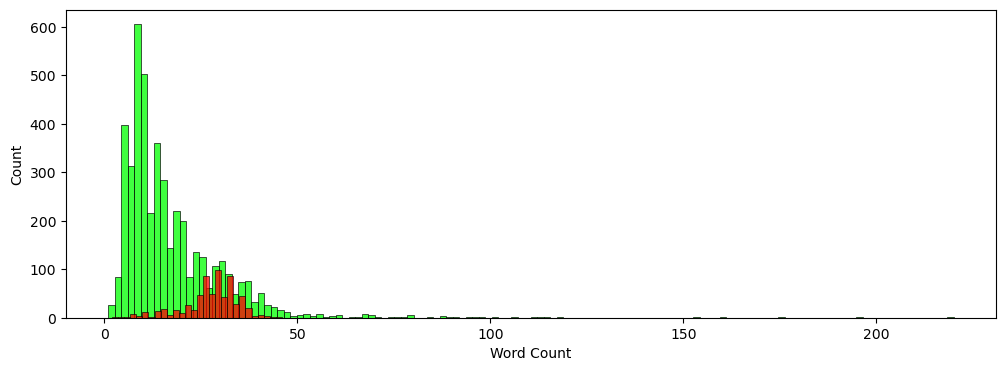

In [38]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['Label'] == 0]['Word Count'],color='#00ff00')
sns.histplot(df[df['Label'] == 1]['Word Count'],color='#ff0000')

<Axes: xlabel='Character Count', ylabel='Count'>

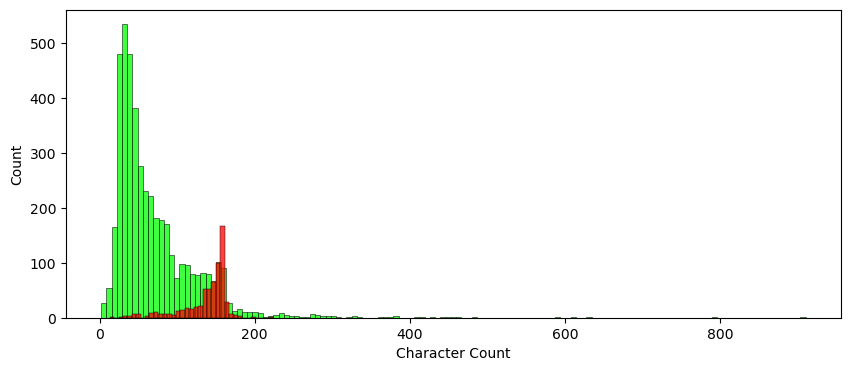

In [39]:
plt.figure(figsize=(10,4))
sns.histplot(df[df['Label'] == 0]['Character Count'],color='#00ff00')
sns.histplot(df[df['Label'] == 1]['Character Count'],color='#ff0000')

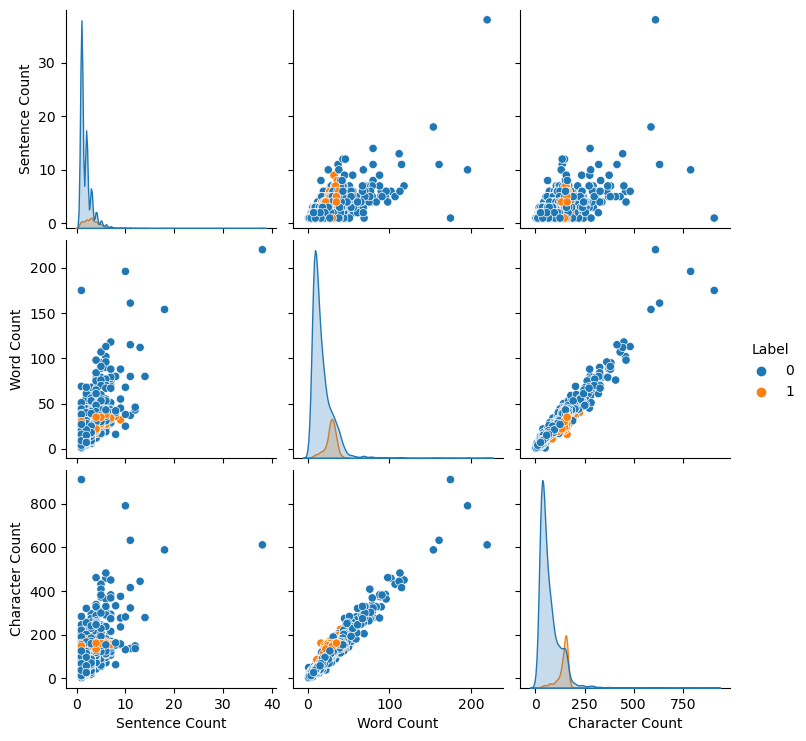

In [40]:
sns.pairplot(df,hue='Label')

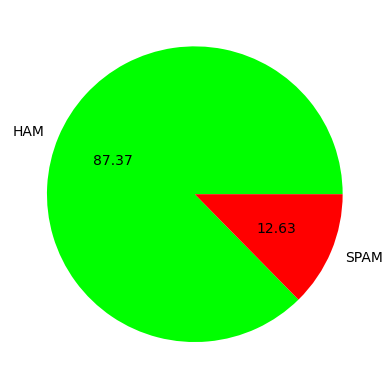

In [41]:
#autopct="%0.2f" shows %
colors = ['#00ff00', '#ff0000']
plt.pie(df['Label'].value_counts(), labels=['HAM', 'SPAM'], autopct="%0.2f", colors=colors)
plt.show()

In [42]:
# Separate the DataFrame into two groups based on the 'spam' column
df_0 = df[df['Label'] == 0] # The group with spam value 0
df_1 = df[df['Label'] == 1] # The group with spam value 1

# Find the number of rows in the smaller group
n = min(len(df_0), len(df_1))

# Sample n rows from the larger group without replacement
df_0_balanced = df_0.sample(n, replace=False)

# Concatenate the balanced group with the smaller group
df_balanced = pd.concat([df_0_balanced, df_1])
df = df_balanced
# Print the balanced DataFrame
print(df_balanced)

      Label                                            Content  \
5299      0               I.ll hand her my phone to chat wit u   
4254      0             How about clothes, jewelry, and trips?   
4666      0                           Not..tel software name..   
555       0  IÛ÷ll have a look at the frying pan in case i...   
995       0                  I can't, I don't have her number!   
...     ...                                                ...   
5538      1  Want explicit SEX in 30 secs? Ring 02073162414...   
5541      1  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...   
5548      1  Had your contract mobile 11 Mnths? Latest Moto...   
5567      1  REMINDER FROM O2: To get 2.50 pounds free call...   
5568      1  This is the 2nd time we have tried 2 contact u...   

      Sentence Count  Word Count  Character Count  
5299               1           9               36  
4254               1           9               38  
4666               1           6               24  

In [43]:
df['Label'].value_counts()

Label
0    653
1    653
Name: count, dtype: int64

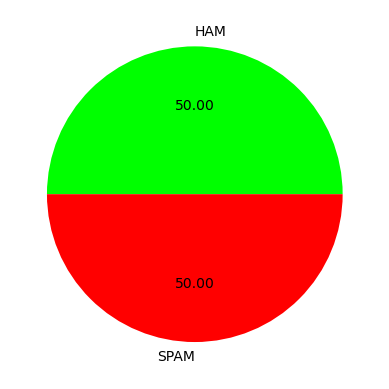

In [44]:
#autopct="%0.2f" shows %
colors = ['#00ff00', '#ff0000']
plt.pie(df['Label'].value_counts(), labels=['HAM', 'SPAM'], autopct="%0.2f", colors=colors)
plt.show()

In [45]:
#3

In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [47]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mandi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [49]:
#Test
df['Content'][69]

'Did you hear about the new \\Divorce Barbie\\"? It comes with all of Ken\'s stuff!"'

In [50]:
transform_text(df['Content'][69])

'hear new come ken stuff'

In [51]:
df['Revised Content'] = df['Content'].apply(transform_text)

In [52]:
df.head(5)

,Label,Content,Sentence Count,Word Count,Character Count,Revised Content
5299,0,I.ll hand her my phone to chat wit u,1,9,36,hand phone chat wit u
4254,0,"How about clothes, jewelry, and trips?",1,9,38,cloth jewelri trip
4666,0,Not..tel software name..,1,6,24,tel softwar name
555,0,IÛ÷ll have a look at the frying pan in case i...,2,29,135,look fri pan case cheap book perhap silli fri ...
995,0,"I can't, I don't have her number!",1,11,33,ca number


In [53]:
!pip3 install wordcloud

In [54]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [55]:
spam_wc = wc.generate(df[df['Label'] == 1]['Revised Content'].str.cat(sep=" "))

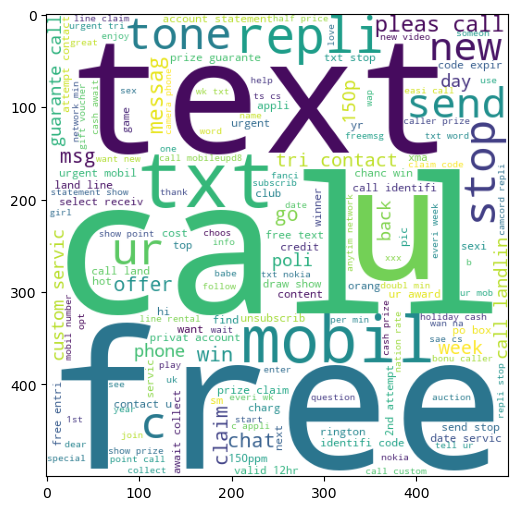

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [57]:
from collections import Counter

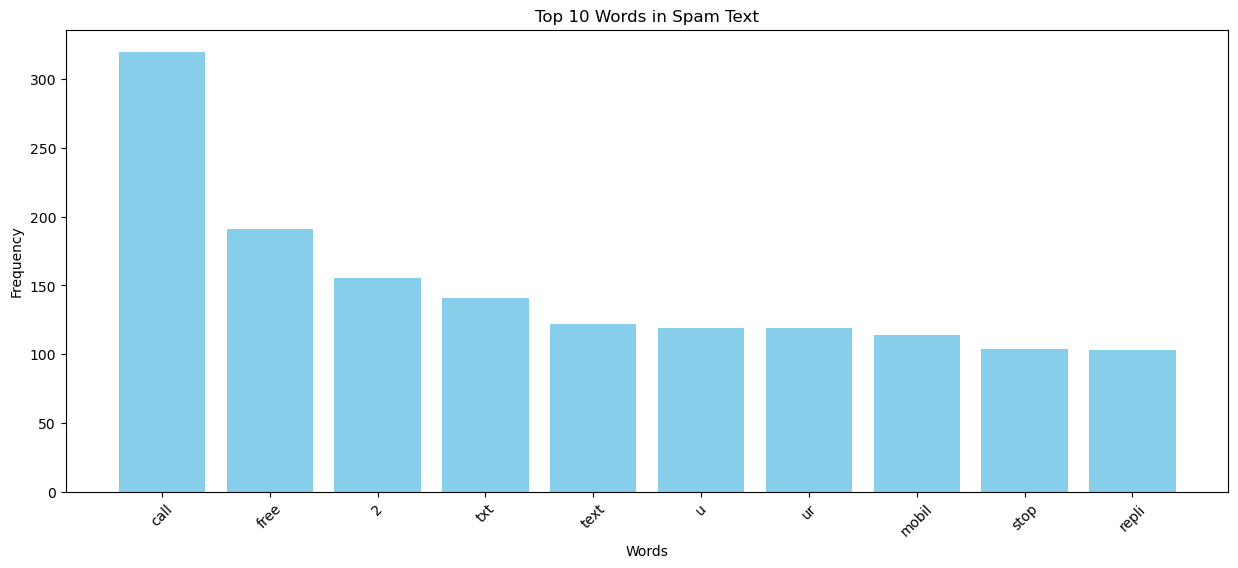

In [58]:
# Assuming 'df' is your DataFrame with 'transformed_text' column and 'target' column
spam_text = df[df['Label'] == 1]['Revised Content'].str.cat(sep=" ")

# Create a Counter object to count word frequencies
word_counts = Counter(spam_text.split())

# Get the most common words and their frequencies
top_words = word_counts.most_common(10)  # You can adjust the number based on your preference

# Extract words and frequencies for plotting
words, frequencies = zip(*top_words)

# Create a bar plot
plt.figure(figsize=(15, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in Spam Text')
plt.xticks(rotation=45)
plt.show()

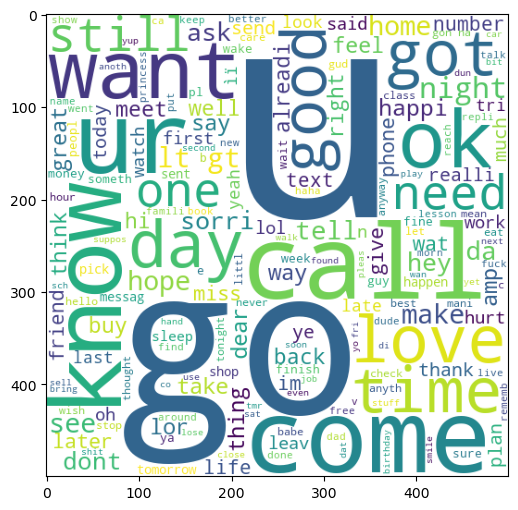

In [59]:
ham_wc = wc.generate(df[df['Label'] == 0]['Revised Content'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

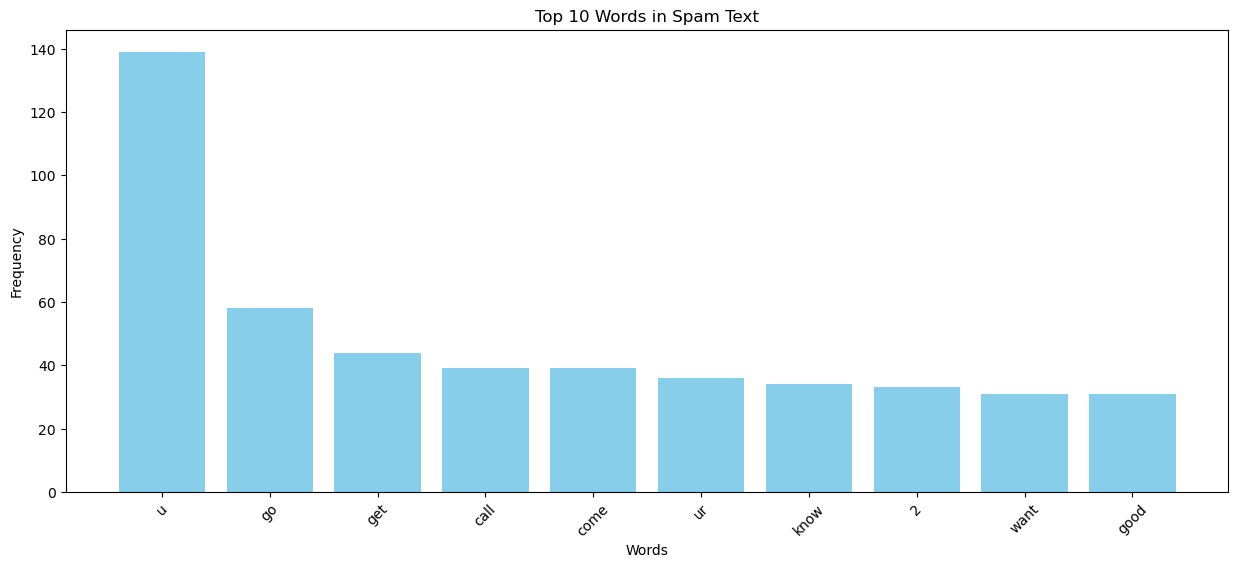

In [60]:
# Assuming 'df' is your DataFrame with 'transformed_text' column and 'target' column
ham_text = df[df['Label'] == 0]['Revised Content'].str.cat(sep=" ")

# Create a Counter object to count word frequencies
word_counts = Counter(ham_text.split())

# Get the most common words and their frequencies
top_words = word_counts.most_common(10)  # You can adjust the number based on your preference

# Extract words and frequencies for plotting
words, frequencies = zip(*top_words)

# Create a bar plot
plt.figure(figsize=(15, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in Spam Text')
plt.xticks(rotation=45)
plt.show()

In [61]:
#4

In [62]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3390)

In [63]:
X = tfidf.fit_transform(df['Revised Content']).toarray()

In [64]:
X.shape

(1306, 3390)

In [65]:
y = df['Label'].values

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, classification_report
from sklearn.model_selection import GridSearchCV

In [69]:
dt = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
mnb = MultinomialNB()

Parameters: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Mean Accuracy: 0.746163047478837
Parameters: {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
Mean Accuracy: 0.746163047478837
Parameters: {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Mean Accuracy: 0.7461446448288553
Parameters: {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
Mean Accuracy: 0.7461446448288553
Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Mean Accuracy: 0.6695390136179611
Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Mean Accuracy: 0.7222165991902834
Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Mean Accuracy: 0.7337964666912036
Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Mean Accuracy: 0.7673168936326832
Parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Mean Accuracy: 0.6465403018034597
Parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Mean Accuracy: 0.7126334192123664
Parameters: {'n_neighbors': 5, 'p': 2, 'weights

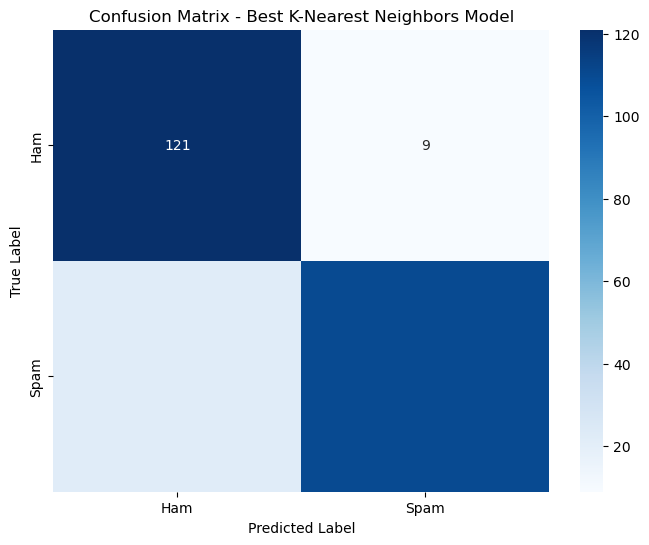

In [70]:
# Define the hyperparameter grid for KNN
knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Use GridSearchCV to find the best hyperparameters for KNN
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)

# Print accuracy for each hyperparameter combination
results = pd.DataFrame(knn_grid_search.cv_results_)
for index, row in results.iterrows():
    print("Parameters:", row['params'])
    print("Mean Accuracy:", row['mean_test_score'])
    print("=====================================")

# Get the best hyperparameters for KNN
best_knn_params = knn_grid_search.best_params_
print("\nBest Hyperparameters for K-Nearest Neighbors:", best_knn_params)

# Use the best KNN model for predictions
best_knn = knn_grid_search.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

# Evaluate the performance of the best KNN model
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
precision_best_knn = precision_score(y_test, y_pred_best_knn)
cm_best_knn = confusion_matrix(y_test, y_pred_best_knn)

# Print evaluation metrics for the best KNN model
print("\nBest K-Nearest Neighbors Model:")
print("Accuracy:", accuracy_best_knn)
print("Precision:", precision_best_knn)
print("Confusion Matrix:")
print(cm_best_knn)

# Visualize the confusion matrix for the best KNN model

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Best K-Nearest Neighbors Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Accuracy: 0.8074806772175194
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mean Accuracy: 0.8093945528156054
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean Accuracy: 0.8074806772175194
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 15}
Mean Accuracy: 0.8093945528156054
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 20}
Mean Accuracy: 0.8074806772175194
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 25}
Mean Accuracy: 0.8074806772175194
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 30}
Mean Accuracy: 0.8065191387559809
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 35}
Mean Accuracy: 0.8074806772175194
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 40}
Mean Accuracy: 0.8074806772175194
Par

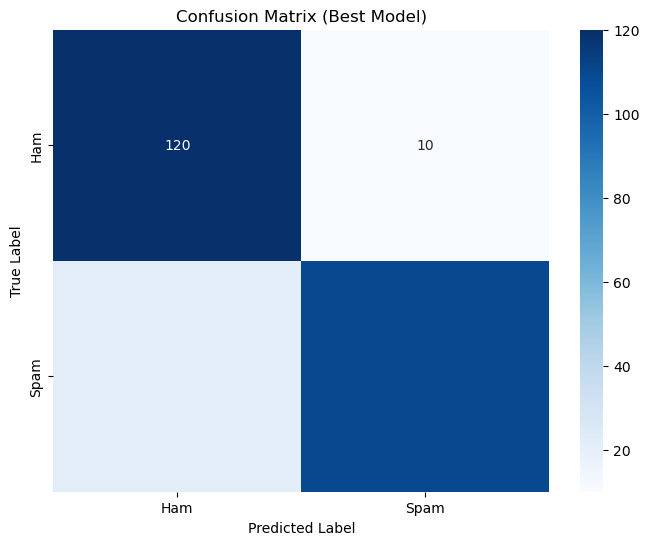

In [71]:
# Define the hyperparameter grid with 10 values for each hyperparameter
param_grid = {
    'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 35, 40, 45],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14, 16, 18]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print accuracy for each hyperparameter combination
results = pd.DataFrame(grid_search.cv_results_)
for index, row in results.iterrows():
    print("Parameters:", row['params'])
    print("Mean Accuracy:", row['mean_test_score'])
    print("=====================================")

# Get the best hyperparameters
best_params = grid_search.best_params_
print("\nBest Hyperparameters:", best_params)

# Create a new DecisionTreeClassifier instance with the best hyperparameters
best_dt = DecisionTreeClassifier(max_depth=best_params['max_depth'], 
                                 min_samples_split=best_params['min_samples_split'], 
                                 min_samples_leaf=best_params['min_samples_leaf'])

# Train the best model with the full training data
best_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_dt = best_dt.predict(X_test)

# Evaluate the performance of the best model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
precision_best_dt = precision_score(y_test, y_pred_best_dt)
cm_best_dt = confusion_matrix(y_test, y_pred_best_dt)

# Print evaluation metrics for the best model
print("\nBest Decision Tree Model:")
print("Accuracy:", accuracy_best_dt)
print("Precision:", precision_best_dt)
print("Confusion Matrix:")
print(cm_best_dt)

# Visualize the confusion matrix for the best model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix (Best Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Multinomial Naive Bayes:
Accuracy: 0.9274809160305344
Precision: 0.924812030075188
Confusion Matrix:
[[120  10]
 [  9 123]]

Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       130
           1       0.92      0.93      0.93       132

    accuracy                           0.93       262
   macro avg       0.93      0.93      0.93       262
weighted avg       0.93      0.93      0.93       262



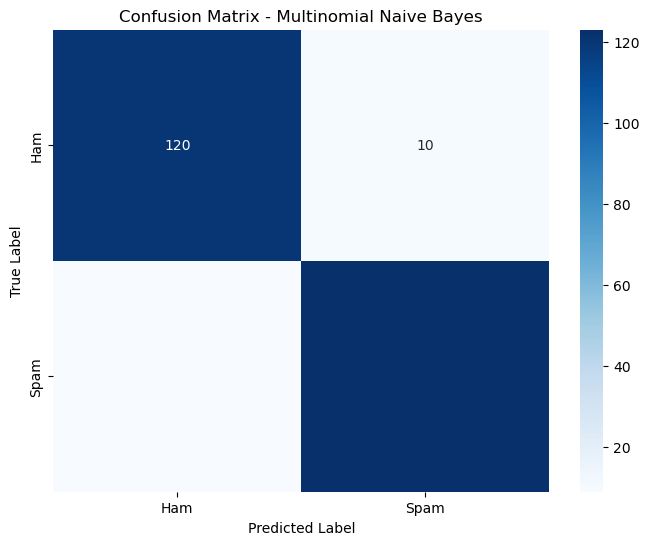

In [72]:
# Multinomial Naive Bayes (MNB)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)

cm_mnb = confusion_matrix(y_test, y_pred_mnb)

print("Multinomial Naive Bayes:")
print("Accuracy:", accuracy_mnb)
print("Precision:", precision_score(y_test, y_pred_mnb))
print("Confusion Matrix:")
print(cm_mnb)

report_mnb = classification_report(y_test, y_pred_mnb)
print("\nClassification Report for Multinomial Naive Bayes:\n", report_mnb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mnb, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

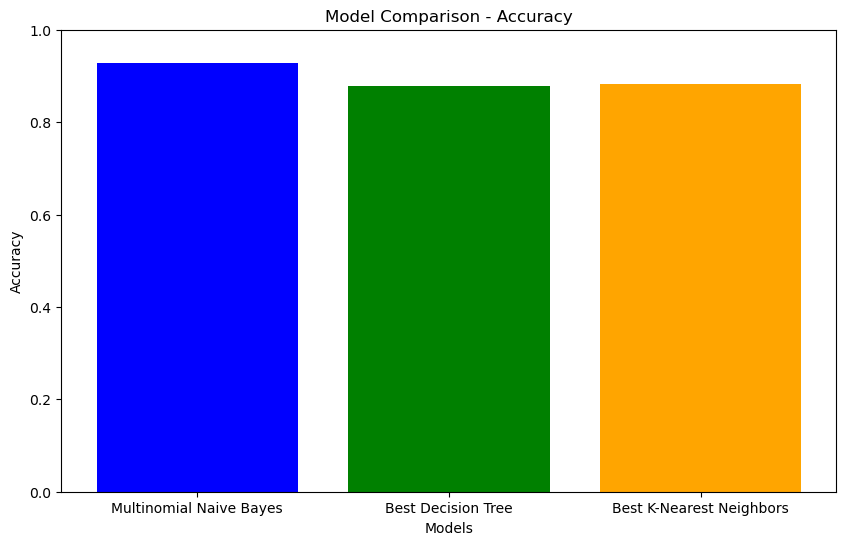

In [73]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
accuracy_scores = [accuracy_mnb, accuracy_best_dt, accuracy_best_knn]

# Precision scores for each model
precision_scores = [precision_score(y_test, y_pred_mnb),
                    precision_best_dt,
                    precision_best_knn]

# Models' names
models = ['Multinomial Naive Bayes', 'Best Decision Tree', 'Best K-Nearest Neighbors']

# Bar graph for accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange'])
plt.title('Model Comparison - Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to better compare accuracies
plt.show()


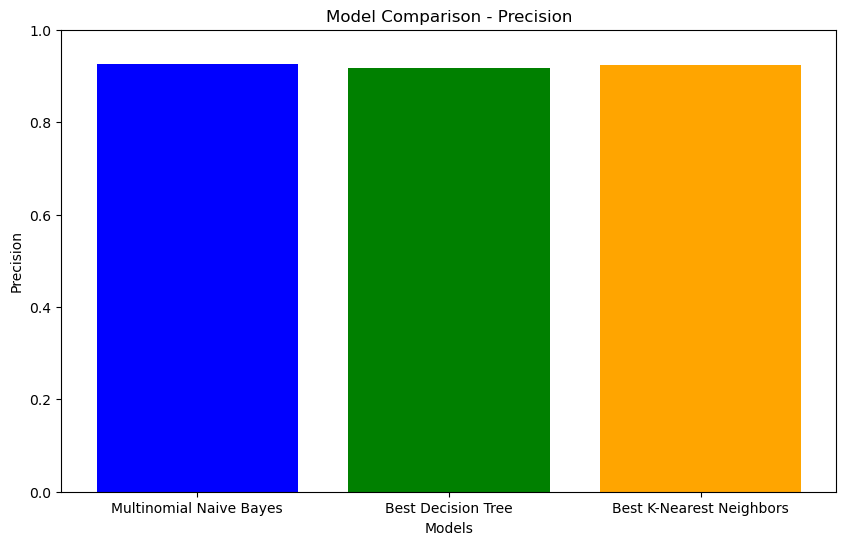

In [74]:
# Bar graph for precision
plt.figure(figsize=(10, 6))
plt.bar(models, precision_scores, color=['blue', 'green', 'orange'])
plt.title('Model Comparison - Precision')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0, 1)  # Set the y-axis limit to better compare precision
plt.show()

In [ ]:
# Define the hyperparameter grid with 10 values for each hyperparameter
param_grid = {
    'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 35, 40, 45],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14, 16, 18]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print accuracy for each hyperparameter combination
results = pd.DataFrame(grid_search.cv_results_)
for index, row in results.iterrows():
    print("Parameters:", row['params'])
    print("Mean Accuracy:", row['mean_test_score'])
    print("=====================================")

# Get the best hyperparameters
best_params = grid_search.best_params_
print("\nBest Hyperparameters:", best_params)

# Create a new DecisionTreeClassifier instance with the best hyperparameters
best_dt = DecisionTreeClassifier(max_depth=best_params['max_depth'], 
                                 min_samples_split=best_params['min_samples_split'], 
                                 min_samples_leaf=best_params['min_samples_leaf'])

# Train the best model with the full training data
best_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_dt = best_dt.predict(X_test)

# Evaluate the performance of the best model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
precision_best_dt = precision_score(y_test, y_pred_best_dt)
cm_best_dt = confusion_matrix(y_test, y_pred_best_dt)

# Print evaluation metrics for the best model
print("\nBest Decision Tree Model:")
print("Accuracy:", accuracy_best_dt)
print("Precision:", precision_best_dt)
print("Confusion Matrix:")
print(cm_best_dt)

# Visualize the confusion matrix for the best model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix (Best Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Load the saved vectorizer for prediction
loaded_vectorizer = joblib.load('vectorizer.joblib')

# Assuming df_balanced is already defined and contains 'Revised Content' column
# Apply the same text transformation and vectorization
X_text = loaded_vectorizer.transform(df_balanced['Revised Content'])

# Decision Tree model
# Assuming best_dt was trained using the original vectorizer
# If not, you need to use the vectorizer that was used during training
prediction_dt = best_dt.predict(X_text)

# K-Nearest Neighbors model
prediction_knn = best_knn.predict(X_text)

# Multinomial Naive Bayes model
prediction_mnb = mnb.predict(X_text)

# Function to preprocess and predict
def predict_spam_or_ham(text):
    # Apply the same text transformation to the input text
    preprocessed_text = transform_text(text)

    # Transform the preprocessed text using the loaded vectorizer
    X_text = loaded_vectorizer.transform([preprocessed_text])

    # Use the Decision Tree model for prediction
    prediction_dt = best_dt.predict(X_text)[0]

    # Use the K-Nearest Neighbors model for prediction
    prediction_knn = best_knn.predict(X_text)[0]

    # Use the Multinomial Naive Bayes model for prediction
    prediction_mnb = mnb.predict(X_text)[0]

    # Return predictions
    return {
        'DecisionTree': 'Spam' if prediction_dt == 1 else 'Ham',
        'KNearestNeighbors': 'Spam' if prediction_knn == 1 else 'Ham',
        'MultinomialNaiveBayes': 'Spam' if prediction_mnb == 1 else 'Ham',
    }

# Example usage:
text_to_predict = "Check out this amazing offer! You've won a prize!"
predictions = predict_spam_or_ham(text_to_predict)

print("Text:", text_to_predict)
print("Predictions:")
for model, result in predictions.items():
    print(f"{model}: {result}")
